In [1]:
import pprint
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
keras.__version__

'2.4.0'

In [3]:
# read the csv file using the pandas library and view the first 5 rows
data = pd.read_csv('../data-sets/insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# now lets check the number of rows and columns in the data set
data.shape

(1338, 7)

In [5]:
# now lets check if any null values in the data set
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# we will have the quick statical over view of the numerical features
data[['age', 'bmi', 'charges']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
# lets move to analysis on the features. First lets see the sex feature
data['sex'].value_counts()

# here we have the almost equal number for male and the female

male      676
female    662
Name: sex, dtype: int64

In [8]:
# lets now look at the somker feature
data['smoker'].value_counts()

# here the data we have more skewed. we have more non smokers when comapred to smokers

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
# lets now look at the region feature
data['region'].value_counts()

# the individual are almost equally and evenly spread across the country

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

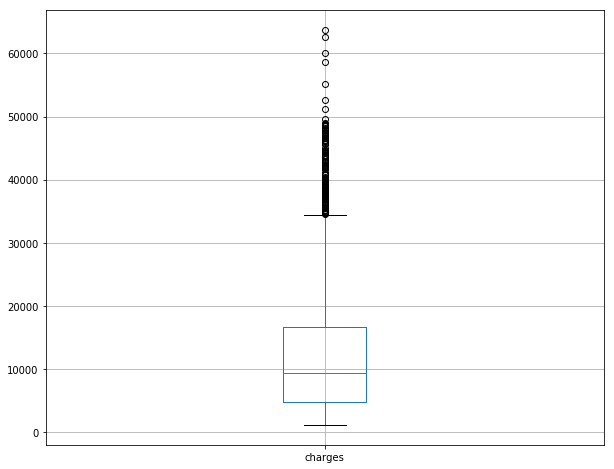

In [10]:
# lets quickly see how insurance charges are by taking look at the box plot

plt.figure(figsize = (10,8))

data.boxplot('charges')

plt.show()

# here most individuals have insurance charges range from 5k to 15k. The 
# box here represents the inter-quantile range. The median is some where under 
# 10k. There are several outliners between 35k to 85k

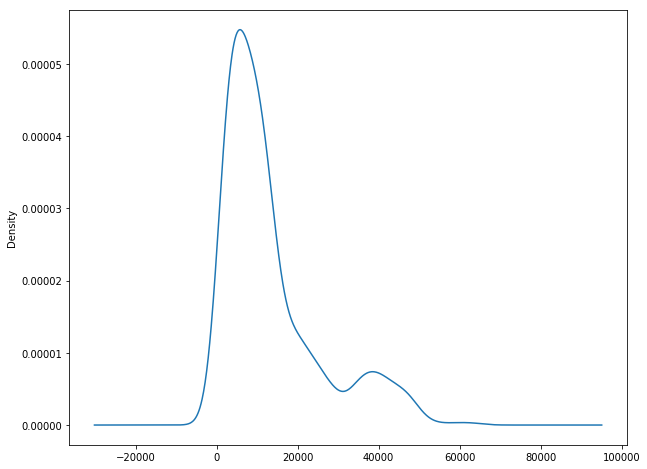

In [11]:
# an another visualization tool technique which is usefull when working with 
# univariate data in order to view the distributions is the kernl density estimation
# (kde). The kde curve gives the proability distribution of our data 
plt.figure(figsize = (10,8))
data['charges'].plot.kde()
plt.show()


# here the curve has 2 peaks at 10k range and 40k.

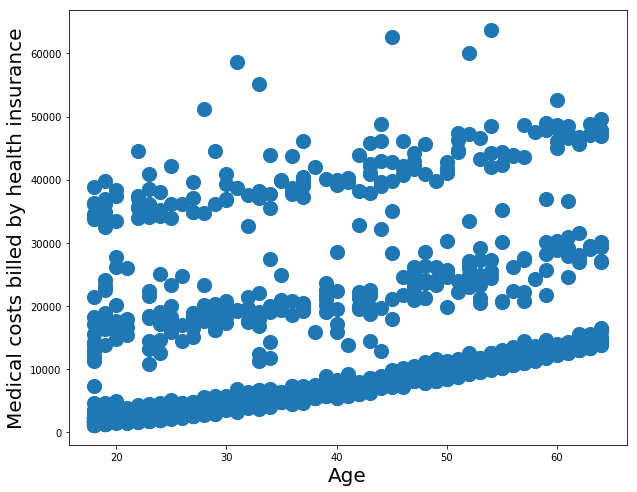

In [12]:
# if you want check out the bivariate relationship the scatter plot is the great
# visualization. 

plt.figure(figsize = (10,8))

plt.scatter(data['age'], data['charges'], s = 200)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Medical costs billed by health insurance', fontsize = 20)
plt.show()

# here we could see the pattern. As age rises the insurance amount raises  

In [13]:
# lets now separate the target from the features
features = data.drop('charges', axis = 1)
target = data[['charges']]

In [14]:
# get the all categorical data 
categorical_features = features[['sex','smoker','region']].copy()

categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [15]:
# get all numerical features
numerical_features = features.drop(['sex','smoker','region'], axis = 1)
numerical_features.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [16]:
# now we replace the categorical feature sex to feamle to 0 and male to 1
gender_dict = {'female': 0, 'male':1}

categorical_features['sex'].replace(gender_dict, inplace = True)

categorical_features.head()

,sex,smoker,region
0,0,yes,southwest
1,1,no,southeast
2,1,no,southeast
3,1,no,northwest
4,1,no,northwest


In [17]:
# now we replace the categorical feature smoker to no to 0 and yes to 1
smoker_dict = {'no':0, 'yes':1}
categorical_features['smoker'].replace(smoker_dict, inplace = True)
categorical_features.head()

,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


In [18]:
# now for the region we will do a one hot encoding using the get_dummies
categorical_features = pd.get_dummies(categorical_features,columns = ['region'])

categorical_features.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [19]:
# we will have the quick statical over view of the numerical features
numerical_features.describe().T

# we need to standardise the value since the mean and standard deviation has 
# are different accross numric features

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,1.094918,1.205493,0.00,0.00000,1.0,2.00000,5.00


In [20]:
# lets now standise the data
standardScaler = StandardScaler()

numerical_features = pd.DataFrame(standardScaler.fit_transform(numerical_features),
                               columns= numerical_features.columns,
                               index = numerical_features.index)

numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,-1.853691e-16,1.000374,-1.509965,-0.869155,-0.014740,0.839674,1.765289
bmi,1338.0,-1.869041e-16,1.000374,-2.412011,-0.716406,-0.043209,0.661157,3.685522
children,1338.0,2.721623e-17,1.000374,-0.908614,-0.908614,-0.078767,0.751079,3.240619


In [21]:
# now we will combine the numerical and categorical features into a single data frame
processed_features = pd.concat([numerical_features, categorical_features], axis = 1, sort = False)

processed_features.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0


In [22]:
# now we will combine the processed features and the target 
processed_data = pd.concat([processed_features, target], axis = 1, sort = False)

processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [23]:
# will write the processed data to the csv 
processed_data.to_csv('../data-sets/insurance_processed.csv')

In [24]:
# now we will spilt our data set into test and train 
x_train,x_test,y_train, y_test = train_test_split(processed_features,
                                                 target,
                                                 test_size = 0.2,
                                                 random_state = 1)

In [25]:
# lets check out the number of records in the train data set
x_train.shape

(1070, 9)

In [26]:
# lets check out the number of reccords in the test data set
x_test.shape

(268, 9)

In [27]:
# now we are building a sequential model for our data set 
# the weights are initialized using the glorot uniform by 
# default and the biases are set to zero
def build_model():
    model =tf.keras.Sequential([
        layers.Dense(32, activation = 'relu', input_shape = [len(x_train.keys())]),
                    layers.Dense(64, activation = 'relu'),
                    layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(0.001)
    
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae','mse'])
    
    return model


In [28]:
# lets go ahead and construct our model
model_relu_64 = build_model()

model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


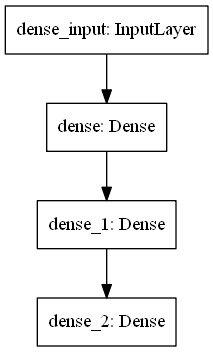

In [29]:
# visual representation of the model 
keras.utils.plot_model(model_relu_64, '../images/model_relu_64.png')

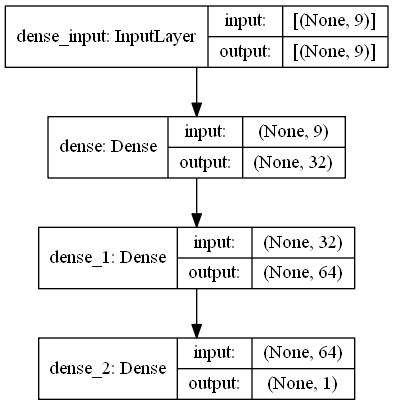

In [30]:
# ifwe want to see the shapes and the number of neurons in each layer
keras.utils.plot_model(model_relu_64, '../images/model_relu_64_shapes.png', show_shapes = True)

In [31]:
# now we will set the training the model 
n_epochs = 1000

training_hist = model_relu_64.fit(x_train,
                                 y_train,
                                 epochs = n_epochs,
                                 validation_split = 0.2,
                                 verbose = True)

Epoch 1/1000
27/27 [==============================] - 1s 16ms/step - loss: 308754627.4286 - mae: 13116.8739 - mse: 308754627.4286 - val_loss: 336109568.0000 - val_mae: 12877.0322 - val_mse: 336109568.0000
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 319943913.1429 - mae: 13301.0724 - mse: 319943913.1429 - val_loss: 336051520.0000 - val_mae: 12874.9629 - val_mse: 336051520.0000
Epoch 3/1000
27/27 [==============================] - 0s 5ms/step - loss: 322281352.5714 - mae: 13328.0969 - mse: 322281352.5714 - val_loss: 335916320.0000 - val_mae: 12870.2754 - val_mse: 335916320.0000
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 336382534.8571 - mae: 13706.0075 - mse: 336382534.8571 - val_loss: 335638272.0000 - val_mae: 12860.8975 - val_mse: 335638272.0000
Epoch 5/1000
27/27 [==============================] - 0s 5ms/step - loss: 288814888.8571 - mae: 12812.6049 - mse: 288814888.8571 - val_loss: 335125568.0000 - val_mae: 12844.0166 - val

27/27 [==============================] - 0s 5ms/step - loss: 95916189.4286 - mae: 7250.2924 - mse: 95916189.4286 - val_loss: 105748728.0000 - val_mae: 7725.2915 - val_mse: 105748728.0000
Epoch 42/1000
27/27 [==============================] - 0s 7ms/step - loss: 86019429.1429 - mae: 6817.0759 - mse: 86019429.1429 - val_loss: 104817976.0000 - val_mae: 7759.8960 - val_mse: 104817976.0000
Epoch 43/1000
27/27 [==============================] - 0s 5ms/step - loss: 90503002.1429 - mae: 7039.5327 - mse: 90503002.1429 - val_loss: 103920928.0000 - val_mae: 7796.0864 - val_mse: 103920928.0000
Epoch 44/1000
27/27 [==============================] - 0s 5ms/step - loss: 92620141.4286 - mae: 7310.5185 - mse: 92620141.4286 - val_loss: 103095248.0000 - val_mae: 7819.3789 - val_mse: 103095248.0000
Epoch 45/1000
27/27 [==============================] - 0s 5ms/step - loss: 92429341.7143 - mae: 7306.1426 - mse: 92429341.7143 - val_loss: 102303824.0000 - val_mae: 7819.2861 - val_mse: 102303824.0000
Epoch 46/

27/27 [==============================] - 0s 7ms/step - loss: 71262790.8571 - mae: 6587.4490 - mse: 71262790.8571 - val_loss: 73149704.0000 - val_mae: 6743.1309 - val_mse: 73149704.0000
Epoch 83/1000
27/27 [==============================] - 0s 5ms/step - loss: 61945064.7143 - mae: 6149.6182 - mse: 61945064.7143 - val_loss: 72327128.0000 - val_mae: 6687.3960 - val_mse: 72327128.0000
Epoch 84/1000
27/27 [==============================] - 0s 5ms/step - loss: 63029992.1429 - mae: 6199.2891 - mse: 63029992.1429 - val_loss: 71506568.0000 - val_mae: 6643.0542 - val_mse: 71506568.0000
Epoch 85/1000
27/27 [==============================] - 0s 5ms/step - loss: 60980016.5714 - mae: 6060.6378 - mse: 60980016.5714 - val_loss: 70705912.0000 - val_mae: 6604.3809 - val_mse: 70705912.0000
Epoch 86/1000
27/27 [==============================] - 0s 5ms/step - loss: 59584662.8571 - mae: 6008.3602 - mse: 59584662.8571 - val_loss: 69859720.0000 - val_mae: 6579.8843 - val_mse: 69859720.0000
Epoch 87/1000
27/27

27/27 [==============================] - 0s 4ms/step - loss: 44998806.8571 - mae: 5114.8098 - mse: 44998806.8571 - val_loss: 44314504.0000 - val_mae: 5021.0933 - val_mse: 44314504.0000
Epoch 124/1000
27/27 [==============================] - 0s 4ms/step - loss: 39844035.2143 - mae: 4858.2308 - mse: 39844035.2143 - val_loss: 43821552.0000 - val_mae: 4969.1274 - val_mse: 43821552.0000
Epoch 125/1000
27/27 [==============================] - 0s 4ms/step - loss: 42165465.2857 - mae: 4947.2012 - mse: 42165465.2857 - val_loss: 43372888.0000 - val_mae: 4931.5972 - val_mse: 43372888.0000
Epoch 126/1000
27/27 [==============================] - 0s 4ms/step - loss: 39960407.4286 - mae: 4847.4768 - mse: 39960407.4286 - val_loss: 42973884.0000 - val_mae: 4871.1250 - val_mse: 42973884.0000
Epoch 127/1000
27/27 [==============================] - 0s 4ms/step - loss: 40687862.1429 - mae: 4787.8609 - mse: 40687862.1429 - val_loss: 42579132.0000 - val_mae: 4864.2368 - val_mse: 42579132.0000
Epoch 128/1000


27/27 [==============================] - 0s 4ms/step - loss: 36544362.0000 - mae: 4305.5160 - mse: 36544362.0000 - val_loss: 35266820.0000 - val_mae: 4036.4514 - val_mse: 35266820.0000
Epoch 165/1000
27/27 [==============================] - 0s 4ms/step - loss: 42206470.5714 - mae: 4413.8947 - mse: 42206470.5714 - val_loss: 35197008.0000 - val_mae: 4028.8020 - val_mse: 35197008.0000
Epoch 166/1000
27/27 [==============================] - 0s 6ms/step - loss: 36402858.9286 - mae: 4247.7603 - mse: 36402858.9286 - val_loss: 35123088.0000 - val_mae: 4010.4807 - val_mse: 35123088.0000
Epoch 167/1000
27/27 [==============================] - 0s 4ms/step - loss: 39341972.1429 - mae: 4394.6360 - mse: 39341972.1429 - val_loss: 35037280.0000 - val_mae: 4011.8953 - val_mse: 35037280.0000
Epoch 168/1000
27/27 [==============================] - 0s 4ms/step - loss: 34777802.5000 - mae: 4089.3154 - mse: 34777802.5000 - val_loss: 35010704.0000 - val_mae: 3993.3044 - val_mse: 35010704.0000
Epoch 169/1000


27/27 [==============================] - 0s 4ms/step - loss: 32242220.3571 - mae: 3814.3254 - mse: 32242220.3571 - val_loss: 33624792.0000 - val_mae: 3846.3127 - val_mse: 33624792.0000
Epoch 206/1000
27/27 [==============================] - 0s 4ms/step - loss: 37530670.4286 - mae: 4120.6871 - mse: 37530670.4286 - val_loss: 33572240.0000 - val_mae: 3857.1990 - val_mse: 33572240.0000
Epoch 207/1000
27/27 [==============================] - 0s 4ms/step - loss: 36098938.2857 - mae: 4144.9811 - mse: 36098938.2857 - val_loss: 33535364.0000 - val_mae: 3858.3853 - val_mse: 33535364.0000
Epoch 208/1000
27/27 [==============================] - 0s 4ms/step - loss: 36139662.2143 - mae: 4118.1886 - mse: 36139662.2143 - val_loss: 33503816.0000 - val_mae: 3854.3999 - val_mse: 33503816.0000
Epoch 209/1000
27/27 [==============================] - 0s 4ms/step - loss: 37039997.2857 - mae: 4187.7555 - mse: 37039997.2857 - val_loss: 33467152.0000 - val_mae: 3860.1956 - val_mse: 33467152.0000
Epoch 210/1000


Epoch 246/1000
27/27 [==============================] - 0s 4ms/step - loss: 33472046.3571 - mae: 4050.9722 - mse: 33472046.3571 - val_loss: 32673062.0000 - val_mae: 3799.2563 - val_mse: 32673060.0000
Epoch 247/1000
27/27 [==============================] - 0s 4ms/step - loss: 38788608.2857 - mae: 4279.9310 - mse: 38788608.2857 - val_loss: 32612278.0000 - val_mae: 3792.9836 - val_mse: 32612278.0000
Epoch 248/1000
27/27 [==============================] - 0s 4ms/step - loss: 34366328.8571 - mae: 4012.1984 - mse: 34366328.8571 - val_loss: 32633584.0000 - val_mae: 3787.4768 - val_mse: 32633584.0000
Epoch 249/1000
27/27 [==============================] - 0s 4ms/step - loss: 33209625.7857 - mae: 3943.7819 - mse: 33209625.7857 - val_loss: 32582702.0000 - val_mae: 3800.3635 - val_mse: 32582702.0000
Epoch 250/1000
27/27 [==============================] - 0s 4ms/step - loss: 30675900.4643 - mae: 3748.7735 - mse: 30675900.4643 - val_loss: 32574334.0000 - val_mae: 3783.5298 - val_mse: 32574334.0000


Epoch 287/1000
27/27 [==============================] - 0s 4ms/step - loss: 34105817.3571 - mae: 3868.1407 - mse: 34105817.3571 - val_loss: 31648016.0000 - val_mae: 3698.8469 - val_mse: 31648016.0000
Epoch 288/1000
27/27 [==============================] - 0s 4ms/step - loss: 32957072.3571 - mae: 3807.6686 - mse: 32957072.3571 - val_loss: 31618812.0000 - val_mae: 3697.8152 - val_mse: 31618812.0000
Epoch 289/1000
27/27 [==============================] - 0s 4ms/step - loss: 34780671.2857 - mae: 4011.6577 - mse: 34780671.2857 - val_loss: 31567176.0000 - val_mae: 3694.7290 - val_mse: 31567176.0000
Epoch 290/1000
27/27 [==============================] - 0s 4ms/step - loss: 31399116.0714 - mae: 3768.4372 - mse: 31399116.0714 - val_loss: 31568394.0000 - val_mae: 3683.8149 - val_mse: 31568394.0000
Epoch 291/1000
27/27 [==============================] - 0s 4ms/step - loss: 35579264.4286 - mae: 4042.4014 - mse: 35579264.4286 - val_loss: 31530480.0000 - val_mae: 3688.7119 - val_mse: 31530480.0000


Epoch 328/1000
27/27 [==============================] - 0s 4ms/step - loss: 29897954.2143 - mae: 3676.5295 - mse: 29897954.2143 - val_loss: 30532556.0000 - val_mae: 3563.4395 - val_mse: 30532556.0000
Epoch 329/1000
27/27 [==============================] - 0s 4ms/step - loss: 31473794.1429 - mae: 3664.7094 - mse: 31473794.1429 - val_loss: 30523052.0000 - val_mae: 3558.1438 - val_mse: 30523052.0000
Epoch 330/1000
27/27 [==============================] - 0s 4ms/step - loss: 34579076.5714 - mae: 3796.2801 - mse: 34579076.5714 - val_loss: 30513764.0000 - val_mae: 3576.4438 - val_mse: 30513764.0000
Epoch 331/1000
27/27 [==============================] - 0s 4ms/step - loss: 33776251.6429 - mae: 3862.3931 - mse: 33776251.6429 - val_loss: 30498694.0000 - val_mae: 3564.5823 - val_mse: 30498694.0000
Epoch 332/1000
27/27 [==============================] - 0s 4ms/step - loss: 32346205.0714 - mae: 3881.3609 - mse: 32346205.0714 - val_loss: 30456858.0000 - val_mae: 3554.1404 - val_mse: 30456858.0000


Epoch 369/1000
27/27 [==============================] - 0s 4ms/step - loss: 31345962.2143 - mae: 3561.1766 - mse: 31345962.2143 - val_loss: 29603744.0000 - val_mae: 3453.0540 - val_mse: 29603744.0000
Epoch 370/1000
27/27 [==============================] - 0s 4ms/step - loss: 28342610.3214 - mae: 3463.6087 - mse: 28342610.3214 - val_loss: 29593534.0000 - val_mae: 3447.0732 - val_mse: 29593534.0000
Epoch 371/1000
27/27 [==============================] - 0s 4ms/step - loss: 28879748.4286 - mae: 3508.0658 - mse: 28879748.4286 - val_loss: 29591718.0000 - val_mae: 3423.6621 - val_mse: 29591718.0000
Epoch 372/1000
27/27 [==============================] - 0s 4ms/step - loss: 29817689.9643 - mae: 3532.4330 - mse: 29817689.9643 - val_loss: 29532758.0000 - val_mae: 3437.6997 - val_mse: 29532758.0000
Epoch 373/1000
27/27 [==============================] - 0s 4ms/step - loss: 28006052.5000 - mae: 3428.1926 - mse: 28006052.5000 - val_loss: 29505718.0000 - val_mae: 3427.7717 - val_mse: 29505718.0000


Epoch 410/1000
27/27 [==============================] - 0s 4ms/step - loss: 27215767.7857 - mae: 3292.9515 - mse: 27215767.7857 - val_loss: 28800636.0000 - val_mae: 3343.9736 - val_mse: 28800636.0000
Epoch 411/1000
27/27 [==============================] - 0s 4ms/step - loss: 28213425.8571 - mae: 3482.5642 - mse: 28213425.8571 - val_loss: 28769558.0000 - val_mae: 3342.4937 - val_mse: 28769558.0000
Epoch 412/1000
27/27 [==============================] - 0s 4ms/step - loss: 28234866.7143 - mae: 3432.3375 - mse: 28234866.7143 - val_loss: 28752724.0000 - val_mae: 3356.6565 - val_mse: 28752724.0000
Epoch 413/1000
27/27 [==============================] - 0s 4ms/step - loss: 30409351.3571 - mae: 3487.3629 - mse: 30409351.3571 - val_loss: 28734224.0000 - val_mae: 3335.4915 - val_mse: 28734224.0000
Epoch 414/1000
27/27 [==============================] - 0s 4ms/step - loss: 27482269.1429 - mae: 3338.0332 - mse: 27482269.1429 - val_loss: 28728660.0000 - val_mae: 3340.4568 - val_mse: 28728660.0000


Epoch 451/1000
27/27 [==============================] - 0s 4ms/step - loss: 27819442.7857 - mae: 3454.5644 - mse: 27819442.7857 - val_loss: 27879056.0000 - val_mae: 3259.4497 - val_mse: 27879056.0000
Epoch 452/1000
27/27 [==============================] - 0s 4ms/step - loss: 29960177.4286 - mae: 3428.7391 - mse: 29960177.4286 - val_loss: 27855046.0000 - val_mae: 3263.2825 - val_mse: 27855046.0000
Epoch 453/1000
27/27 [==============================] - 0s 4ms/step - loss: 29725579.4286 - mae: 3459.1524 - mse: 29725579.4286 - val_loss: 27835900.0000 - val_mae: 3251.8203 - val_mse: 27835900.0000
Epoch 454/1000
27/27 [==============================] - 0s 4ms/step - loss: 30174278.0000 - mae: 3498.8397 - mse: 30174278.0000 - val_loss: 27822888.0000 - val_mae: 3247.3928 - val_mse: 27822888.0000
Epoch 455/1000
27/27 [==============================] - 0s 4ms/step - loss: 28401272.5000 - mae: 3378.1441 - mse: 28401272.5000 - val_loss: 27800572.0000 - val_mae: 3257.8860 - val_mse: 27800572.0000


Epoch 492/1000
27/27 [==============================] - 0s 4ms/step - loss: 25511425.2857 - mae: 3215.7773 - mse: 25511425.2857 - val_loss: 26975540.0000 - val_mae: 3165.7856 - val_mse: 26975540.0000
Epoch 493/1000
27/27 [==============================] - 0s 4ms/step - loss: 25762452.5714 - mae: 3244.1229 - mse: 25762452.5714 - val_loss: 26976858.0000 - val_mae: 3170.9104 - val_mse: 26976858.0000
Epoch 494/1000
27/27 [==============================] - 0s 4ms/step - loss: 25067825.6429 - mae: 3213.7184 - mse: 25067825.6429 - val_loss: 26935344.0000 - val_mae: 3158.4238 - val_mse: 26935344.0000
Epoch 495/1000
27/27 [==============================] - 0s 4ms/step - loss: 24978927.5000 - mae: 3166.0302 - mse: 24978927.5000 - val_loss: 26903980.0000 - val_mae: 3150.9231 - val_mse: 26903980.0000
Epoch 496/1000
27/27 [==============================] - 0s 4ms/step - loss: 25394574.5000 - mae: 3255.1936 - mse: 25394574.5000 - val_loss: 26897338.0000 - val_mae: 3152.7634 - val_mse: 26897336.0000


Epoch 533/1000
27/27 [==============================] - 0s 4ms/step - loss: 25481040.5000 - mae: 3231.1354 - mse: 25481040.5000 - val_loss: 26127278.0000 - val_mae: 3074.8347 - val_mse: 26127278.0000
Epoch 534/1000
27/27 [==============================] - 0s 4ms/step - loss: 27734436.7857 - mae: 3319.0526 - mse: 27734436.7857 - val_loss: 26112436.0000 - val_mae: 3072.7773 - val_mse: 26112436.0000
Epoch 535/1000
27/27 [==============================] - 0s 4ms/step - loss: 26479146.0714 - mae: 3229.3757 - mse: 26479146.0714 - val_loss: 26092792.0000 - val_mae: 3080.8108 - val_mse: 26092792.0000
Epoch 536/1000
27/27 [==============================] - 0s 4ms/step - loss: 28755616.6429 - mae: 3370.2371 - mse: 28755616.6429 - val_loss: 26069396.0000 - val_mae: 3065.6443 - val_mse: 26069396.0000
Epoch 537/1000
27/27 [==============================] - 0s 4ms/step - loss: 26326655.2143 - mae: 3213.5020 - mse: 26326655.2143 - val_loss: 26042290.0000 - val_mae: 3054.9282 - val_mse: 26042290.0000


Epoch 574/1000
27/27 [==============================] - 0s 4ms/step - loss: 22154042.2857 - mae: 2942.8774 - mse: 22154042.2857 - val_loss: 25351634.0000 - val_mae: 2998.9958 - val_mse: 25351634.0000
Epoch 575/1000
27/27 [==============================] - 0s 4ms/step - loss: 23703977.7857 - mae: 3069.8977 - mse: 23703977.7857 - val_loss: 25320510.0000 - val_mae: 2995.5132 - val_mse: 25320510.0000
Epoch 576/1000
27/27 [==============================] - 0s 4ms/step - loss: 27684833.0000 - mae: 3289.1875 - mse: 27684833.0000 - val_loss: 25336100.0000 - val_mae: 3030.1538 - val_mse: 25336100.0000
Epoch 577/1000
27/27 [==============================] - 0s 4ms/step - loss: 27150873.2857 - mae: 3291.9939 - mse: 27150873.2857 - val_loss: 25318566.0000 - val_mae: 3010.1711 - val_mse: 25318566.0000
Epoch 578/1000
27/27 [==============================] - 0s 4ms/step - loss: 29548186.4286 - mae: 3333.5042 - mse: 29548186.4286 - val_loss: 25305834.0000 - val_mae: 2994.8972 - val_mse: 25305834.0000


Epoch 615/1000
27/27 [==============================] - 0s 4ms/step - loss: 22084958.7500 - mae: 2967.5093 - mse: 22084958.7500 - val_loss: 24579360.0000 - val_mae: 2938.5117 - val_mse: 24579360.0000
Epoch 616/1000
27/27 [==============================] - 0s 4ms/step - loss: 25556021.3571 - mae: 3167.6522 - mse: 25556021.3571 - val_loss: 24576722.0000 - val_mae: 2930.2244 - val_mse: 24576722.0000
Epoch 617/1000
27/27 [==============================] - 0s 4ms/step - loss: 24576346.0714 - mae: 3085.2186 - mse: 24576346.0714 - val_loss: 24541270.0000 - val_mae: 2925.4336 - val_mse: 24541270.0000
Epoch 618/1000
27/27 [==============================] - 0s 4ms/step - loss: 24802879.9286 - mae: 3074.4719 - mse: 24802879.9286 - val_loss: 24551002.0000 - val_mae: 2947.2600 - val_mse: 24551002.0000
Epoch 619/1000
27/27 [==============================] - 0s 4ms/step - loss: 19952353.9643 - mae: 2865.6947 - mse: 19952353.9643 - val_loss: 24524884.0000 - val_mae: 2919.4736 - val_mse: 24524884.0000


Epoch 656/1000
27/27 [==============================] - 0s 4ms/step - loss: 27453262.5000 - mae: 3222.0156 - mse: 27453262.5000 - val_loss: 24045780.0000 - val_mae: 2895.9756 - val_mse: 24045780.0000
Epoch 657/1000
27/27 [==============================] - 0s 4ms/step - loss: 21853026.0714 - mae: 2999.3453 - mse: 21853026.0714 - val_loss: 23998296.0000 - val_mae: 2869.2822 - val_mse: 23998296.0000
Epoch 658/1000
27/27 [==============================] - 0s 4ms/step - loss: 25321166.9286 - mae: 3114.8248 - mse: 25321166.9286 - val_loss: 24010652.0000 - val_mae: 2892.3171 - val_mse: 24010652.0000
Epoch 659/1000
27/27 [==============================] - 0s 4ms/step - loss: 25345943.2143 - mae: 3142.7360 - mse: 25345943.2143 - val_loss: 23997500.0000 - val_mae: 2878.8650 - val_mse: 23997500.0000
Epoch 660/1000
27/27 [==============================] - 0s 4ms/step - loss: 21614315.0357 - mae: 2968.8889 - mse: 21614315.0357 - val_loss: 23983800.0000 - val_mae: 2879.6670 - val_mse: 23983800.0000


Epoch 697/1000
27/27 [==============================] - 0s 4ms/step - loss: 21491309.2143 - mae: 2936.9462 - mse: 21491309.2143 - val_loss: 23596142.0000 - val_mae: 2832.4072 - val_mse: 23596142.0000
Epoch 698/1000
27/27 [==============================] - 0s 4ms/step - loss: 21454019.0714 - mae: 2870.1142 - mse: 21454019.0714 - val_loss: 23608750.0000 - val_mae: 2851.9897 - val_mse: 23608750.0000
Epoch 699/1000
27/27 [==============================] - 0s 4ms/step - loss: 30600615.3571 - mae: 3410.7140 - mse: 30600615.3571 - val_loss: 23604066.0000 - val_mae: 2857.9294 - val_mse: 23604066.0000
Epoch 700/1000
27/27 [==============================] - 0s 4ms/step - loss: 23871347.2143 - mae: 3006.9609 - mse: 23871347.2143 - val_loss: 23589428.0000 - val_mae: 2853.4688 - val_mse: 23589428.0000
Epoch 701/1000
27/27 [==============================] - 0s 4ms/step - loss: 24944575.2143 - mae: 3076.1903 - mse: 24944575.2143 - val_loss: 23600568.0000 - val_mae: 2863.7932 - val_mse: 23600568.0000


Epoch 738/1000
27/27 [==============================] - 0s 4ms/step - loss: 25121972.9286 - mae: 3049.4122 - mse: 25121972.9286 - val_loss: 23272328.0000 - val_mae: 2828.7427 - val_mse: 23272328.0000
Epoch 739/1000
27/27 [==============================] - 0s 4ms/step - loss: 19209516.5893 - mae: 2685.5472 - mse: 19209516.5893 - val_loss: 23250748.0000 - val_mae: 2802.2327 - val_mse: 23250748.0000
Epoch 740/1000
27/27 [==============================] - 0s 4ms/step - loss: 24328596.6429 - mae: 3006.4933 - mse: 24328596.6429 - val_loss: 23274726.0000 - val_mae: 2829.1975 - val_mse: 23274726.0000
Epoch 741/1000
27/27 [==============================] - 0s 4ms/step - loss: 22001456.6429 - mae: 2973.5247 - mse: 22001456.6429 - val_loss: 23259116.0000 - val_mae: 2827.6294 - val_mse: 23259116.0000
Epoch 742/1000
27/27 [==============================] - 0s 4ms/step - loss: 22583577.0000 - mae: 2976.5135 - mse: 22583577.0000 - val_loss: 23243528.0000 - val_mae: 2830.5791 - val_mse: 23243528.0000


Epoch 779/1000
27/27 [==============================] - 0s 4ms/step - loss: 21572461.9643 - mae: 2848.0705 - mse: 21572461.9643 - val_loss: 22976698.0000 - val_mae: 2799.3328 - val_mse: 22976698.0000
Epoch 780/1000
27/27 [==============================] - 0s 4ms/step - loss: 20580082.5357 - mae: 2821.9005 - mse: 20580082.5357 - val_loss: 22956864.0000 - val_mae: 2790.4272 - val_mse: 22956864.0000
Epoch 781/1000
27/27 [==============================] - 0s 4ms/step - loss: 25507539.7857 - mae: 3064.7275 - mse: 25507539.7857 - val_loss: 22956292.0000 - val_mae: 2792.8254 - val_mse: 22956292.0000
Epoch 782/1000
27/27 [==============================] - 0s 4ms/step - loss: 27888012.2143 - mae: 3157.9271 - mse: 27888012.2143 - val_loss: 22999854.0000 - val_mae: 2825.0964 - val_mse: 22999854.0000
Epoch 783/1000
27/27 [==============================] - 0s 4ms/step - loss: 22554420.4286 - mae: 2996.1976 - mse: 22554420.4286 - val_loss: 22956284.0000 - val_mae: 2799.3313 - val_mse: 22956284.0000


Epoch 820/1000
27/27 [==============================] - 0s 4ms/step - loss: 19917799.3929 - mae: 2723.1214 - mse: 19917799.3929 - val_loss: 22774122.0000 - val_mae: 2801.5830 - val_mse: 22774122.0000
Epoch 821/1000
27/27 [==============================] - 0s 4ms/step - loss: 24909186.0714 - mae: 3017.0682 - mse: 24909186.0714 - val_loss: 22711150.0000 - val_mae: 2770.3157 - val_mse: 22711150.0000
Epoch 822/1000
27/27 [==============================] - 0s 4ms/step - loss: 20254925.5000 - mae: 2788.5206 - mse: 20254925.5000 - val_loss: 22686704.0000 - val_mae: 2756.9470 - val_mse: 22686704.0000
Epoch 823/1000
27/27 [==============================] - 0s 4ms/step - loss: 18146058.3214 - mae: 2674.1289 - mse: 18146058.3214 - val_loss: 22727000.0000 - val_mae: 2787.0222 - val_mse: 22727000.0000
Epoch 824/1000
27/27 [==============================] - 0s 4ms/step - loss: 26699598.2143 - mae: 3123.6041 - mse: 26699598.2143 - val_loss: 22741822.0000 - val_mae: 2801.9329 - val_mse: 22741822.0000


Epoch 861/1000
27/27 [==============================] - 0s 4ms/step - loss: 23751019.0357 - mae: 2961.2154 - mse: 23751019.0357 - val_loss: 22500938.0000 - val_mae: 2771.9375 - val_mse: 22500938.0000
Epoch 862/1000
27/27 [==============================] - 0s 4ms/step - loss: 22603268.0714 - mae: 2913.7702 - mse: 22603268.0714 - val_loss: 22452018.0000 - val_mae: 2750.5420 - val_mse: 22452018.0000
Epoch 863/1000
27/27 [==============================] - 0s 4ms/step - loss: 18656305.3929 - mae: 2647.3299 - mse: 18656305.3929 - val_loss: 22415160.0000 - val_mae: 2727.6143 - val_mse: 22415160.0000
Epoch 864/1000
27/27 [==============================] - 0s 4ms/step - loss: 22520952.4286 - mae: 2933.1868 - mse: 22520952.4286 - val_loss: 22485392.0000 - val_mae: 2770.9658 - val_mse: 22485390.0000
Epoch 865/1000
27/27 [==============================] - 0s 4ms/step - loss: 21620956.0714 - mae: 2840.1347 - mse: 21620956.0714 - val_loss: 22437962.0000 - val_mae: 2748.9363 - val_mse: 22437962.0000


Epoch 902/1000
27/27 [==============================] - 0s 4ms/step - loss: 21671982.7857 - mae: 2822.1690 - mse: 21671982.7857 - val_loss: 22218262.0000 - val_mae: 2732.1418 - val_mse: 22218262.0000
Epoch 903/1000
27/27 [==============================] - 0s 4ms/step - loss: 21108365.1071 - mae: 2735.6578 - mse: 21108365.1071 - val_loss: 22222192.0000 - val_mae: 2739.1975 - val_mse: 22222192.0000
Epoch 904/1000
27/27 [==============================] - 0s 4ms/step - loss: 18787887.2500 - mae: 2648.0320 - mse: 18787887.2500 - val_loss: 22192494.0000 - val_mae: 2715.7302 - val_mse: 22192494.0000
Epoch 905/1000
27/27 [==============================] - 0s 4ms/step - loss: 19480473.8571 - mae: 2707.5655 - mse: 19480473.8571 - val_loss: 22243144.0000 - val_mae: 2747.9861 - val_mse: 22243144.0000
Epoch 906/1000
27/27 [==============================] - 0s 4ms/step - loss: 25200342.5714 - mae: 3048.9942 - mse: 25200342.5714 - val_loss: 22276866.0000 - val_mae: 2770.4602 - val_mse: 22276866.0000


Epoch 943/1000
27/27 [==============================] - 0s 4ms/step - loss: 25480590.4286 - mae: 3025.0227 - mse: 25480590.4286 - val_loss: 22042030.0000 - val_mae: 2738.8406 - val_mse: 22042030.0000
Epoch 944/1000
27/27 [==============================] - 0s 4ms/step - loss: 21429008.7321 - mae: 2743.7106 - mse: 21429008.7321 - val_loss: 22023422.0000 - val_mae: 2728.6572 - val_mse: 22023422.0000
Epoch 945/1000
27/27 [==============================] - 0s 4ms/step - loss: 23712252.2857 - mae: 2970.4139 - mse: 23712252.2857 - val_loss: 22007162.0000 - val_mae: 2722.6484 - val_mse: 22007162.0000
Epoch 946/1000
27/27 [==============================] - 0s 4ms/step - loss: 18887287.7679 - mae: 2661.3188 - mse: 18887287.7679 - val_loss: 22017390.0000 - val_mae: 2722.9817 - val_mse: 22017390.0000
Epoch 947/1000
27/27 [==============================] - 0s 4ms/step - loss: 19953147.6786 - mae: 2665.0505 - mse: 19953147.6786 - val_loss: 22013756.0000 - val_mae: 2722.6360 - val_mse: 22013756.0000


Epoch 984/1000
27/27 [==============================] - 0s 4ms/step - loss: 22203091.5000 - mae: 2879.0111 - mse: 22203091.5000 - val_loss: 21923418.0000 - val_mae: 2744.6414 - val_mse: 21923418.0000
Epoch 985/1000
27/27 [==============================] - 0s 4ms/step - loss: 23785400.7143 - mae: 2940.5855 - mse: 23785400.7143 - val_loss: 21842766.0000 - val_mae: 2703.7659 - val_mse: 21842766.0000
Epoch 986/1000
27/27 [==============================] - 0s 4ms/step - loss: 21190762.1429 - mae: 2774.2340 - mse: 21190762.1429 - val_loss: 21888356.0000 - val_mae: 2734.1638 - val_mse: 21888356.0000
Epoch 987/1000
27/27 [==============================] - 0s 4ms/step - loss: 21337934.7143 - mae: 2781.4135 - mse: 21337934.7143 - val_loss: 21923194.0000 - val_mae: 2747.8225 - val_mse: 21923194.0000
Epoch 988/1000
27/27 [==============================] - 0s 4ms/step - loss: 22917994.7857 - mae: 2899.5179 - mse: 22917994.7857 - val_loss: 21865130.0000 - val_mae: 2719.8584 - val_mse: 21865130.0000


In [32]:
# we will store the training process in a data frame 
# using the history property
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,20976932.0,2741.764404,20976932.0,21835946.0,2719.351562,21835946.0,995
996,20975826.0,2732.426758,20975826.0,21857740.0,2725.771729,21857742.0,996
997,20969354.0,2748.565918,20969354.0,21827270.0,2718.533936,21827270.0,997
998,20962222.0,2739.126221,20962222.0,21857282.0,2731.924072,21857282.0,998
999,20960650.0,2744.229248,20960650.0,21844834.0,2732.210938,21844836.0,999


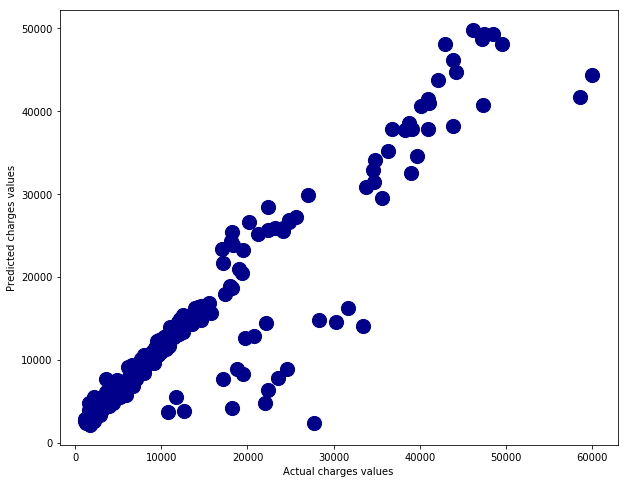

In [33]:
# now we will use our model for the prediction 
y_pred = model_relu_64.predict(x_test).flatten()

plt.figure(figsize = (10,8))

plt.scatter(y_test, y_pred, s = 200, c = 'darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')

plt.show()

In [34]:
# the object of the model is to get the r2 score 
r2_score(y_test, y_pred)

0.8684622979976164

In [35]:
# now we will build our model using some drop outs
# the exponential linear unit (elu) activation tends to converge
# faster and produce more accurate results. Also 
# migtigates the saturation of neuron during the training proess
# by getting the neurons to operate in their active region
# dropouts are used to mitigate the over fitting in your data
def build_model_elu():
    model = tf.keras.Sequential([
        layers.Dense(32, activation = 'elu', input_shape = [len(x_train.keys())]),
        layers.Dropout(0.2),
        layers.Dense(64, activation = 'elu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
    
    return model

In [36]:
# lets now build the with elu activation and dropouts
model_elu_64 = build_model_elu()

model_elu_64.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


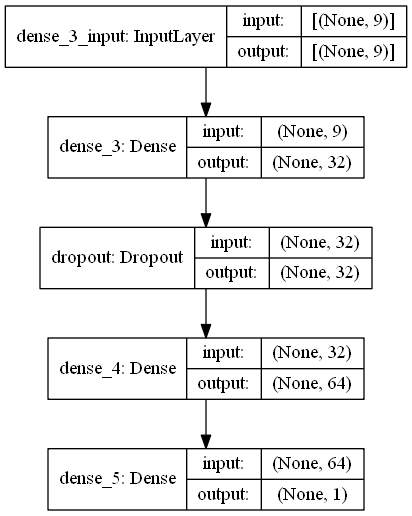

In [37]:
# ifwe want to see the shapes and the number of neurons in each layer
keras.utils.plot_model(model_elu_64, '../images/model_elu_64_shapes.png', show_shapes = True)

In [38]:
# now we will set the training the model 
training_hist_elu= model_elu_64.fit(x_train,
                                 y_train,
                                 epochs = n_epochs,
                                 validation_split = 0.2,
                                 verbose = True)

Epoch 1/1000
27/27 [==============================] - 0s 8ms/step - loss: 332295798.8571 - mae: 13692.0749 - mse: 332295798.8571 - val_loss: 336083776.0000 - val_mae: 12876.4590 - val_mse: 336083776.0000
Epoch 2/1000
27/27 [==============================] - 0s 5ms/step - loss: 330782906.2857 - mae: 13664.8120 - mse: 330782906.2857 - val_loss: 335988992.0000 - val_mae: 12873.5059 - val_mse: 335988992.0000
Epoch 3/1000
27/27 [==============================] - 0s 5ms/step - loss: 318247794.2857 - mae: 13198.3779 - mse: 318247794.2857 - val_loss: 335798656.0000 - val_mae: 12867.4805 - val_mse: 335798656.0000
Epoch 4/1000
27/27 [==============================] - 0s 5ms/step - loss: 328860497.1429 - mae: 13495.7390 - mse: 328860497.1429 - val_loss: 335467040.0000 - val_mae: 12856.7861 - val_mse: 335467040.0000
Epoch 5/1000
27/27 [==============================] - 0s 5ms/step - loss: 318771280.0000 - mae: 13388.8342 - mse: 318771280.0000 - val_loss: 334952544.0000 - val_mae: 12840.2803 - val_

27/27 [==============================] - 0s 4ms/step - loss: 120392616.2857 - mae: 6985.9926 - mse: 120392616.2857 - val_loss: 126294064.0000 - val_mae: 7145.9058 - val_mse: 126294064.0000
Epoch 42/1000
27/27 [==============================] - 0s 4ms/step - loss: 118511188.2857 - mae: 6962.5037 - mse: 118511188.2857 - val_loss: 123037432.0000 - val_mae: 7221.3286 - val_mse: 123037432.0000
Epoch 43/1000
27/27 [==============================] - 0s 4ms/step - loss: 108296753.1429 - mae: 6805.7376 - mse: 108296753.1429 - val_loss: 120157432.0000 - val_mae: 7298.3564 - val_mse: 120157432.0000
Epoch 44/1000
27/27 [==============================] - 0s 4ms/step - loss: 99040145.7143 - mae: 6642.3085 - mse: 99040145.7143 - val_loss: 117829576.0000 - val_mae: 7373.1284 - val_mse: 117829576.0000
Epoch 45/1000
27/27 [==============================] - 0s 4ms/step - loss: 105411948.5714 - mae: 7100.9865 - mse: 105411948.5714 - val_loss: 115647200.0000 - val_mae: 7457.0532 - val_mse: 115647200.0000
E

Epoch 82/1000
27/27 [==============================] - 0s 4ms/step - loss: 71011860.4286 - mae: 6195.2453 - mse: 71011860.4286 - val_loss: 67331320.0000 - val_mae: 6135.4883 - val_mse: 67331320.0000
Epoch 83/1000
27/27 [==============================] - 0s 4ms/step - loss: 63350176.4286 - mae: 5904.6459 - mse: 63350176.4286 - val_loss: 65592668.0000 - val_mae: 6030.9297 - val_mse: 65592668.0000
Epoch 84/1000
27/27 [==============================] - 0s 4ms/step - loss: 54769223.1429 - mae: 5487.5016 - mse: 54769223.1429 - val_loss: 63935332.0000 - val_mae: 5915.8887 - val_mse: 63935332.0000
Epoch 85/1000
27/27 [==============================] - 0s 4ms/step - loss: 56847794.7143 - mae: 5607.6277 - mse: 56847794.7143 - val_loss: 62064416.0000 - val_mae: 5824.5435 - val_mse: 62064416.0000
Epoch 86/1000
27/27 [==============================] - 0s 4ms/step - loss: 62223166.0000 - mae: 5944.2025 - mse: 62223166.0000 - val_loss: 60366384.0000 - val_mae: 5713.1182 - val_mse: 60366384.0000
Epoch

27/27 [==============================] - 0s 4ms/step - loss: 36960060.7857 - mae: 4295.3866 - mse: 36960060.7857 - val_loss: 29253696.0000 - val_mae: 3622.2197 - val_mse: 29253696.0000
Epoch 124/1000
27/27 [==============================] - 0s 4ms/step - loss: 33627975.4286 - mae: 3976.5177 - mse: 33627975.4286 - val_loss: 29042362.0000 - val_mae: 3614.2246 - val_mse: 29042362.0000
Epoch 125/1000
27/27 [==============================] - 0s 4ms/step - loss: 36345378.7857 - mae: 4145.1734 - mse: 36345378.7857 - val_loss: 28827336.0000 - val_mae: 3592.8977 - val_mse: 28827336.0000
Epoch 126/1000
27/27 [==============================] - 0s 4ms/step - loss: 35427158.2857 - mae: 4182.1499 - mse: 35427158.2857 - val_loss: 28633376.0000 - val_mae: 3568.0496 - val_mse: 28633376.0000
Epoch 127/1000
27/27 [==============================] - 0s 4ms/step - loss: 40255057.2857 - mae: 4460.2960 - mse: 40255057.2857 - val_loss: 28529662.0000 - val_mae: 3577.7051 - val_mse: 28529662.0000
Epoch 128/1000


27/27 [==============================] - 0s 4ms/step - loss: 33741490.5000 - mae: 3907.4605 - mse: 33741490.5000 - val_loss: 25481220.0000 - val_mae: 3186.4639 - val_mse: 25481220.0000
Epoch 165/1000
27/27 [==============================] - 0s 4ms/step - loss: 34751799.2857 - mae: 3932.9669 - mse: 34751799.2857 - val_loss: 25451622.0000 - val_mae: 3186.7874 - val_mse: 25451622.0000
Epoch 166/1000
27/27 [==============================] - 0s 4ms/step - loss: 33546016.2857 - mae: 3958.6281 - mse: 33546016.2857 - val_loss: 25403236.0000 - val_mae: 3173.5869 - val_mse: 25403236.0000
Epoch 167/1000
27/27 [==============================] - 0s 4ms/step - loss: 31851736.1429 - mae: 3825.9432 - mse: 31851736.1429 - val_loss: 25334526.0000 - val_mae: 3135.0615 - val_mse: 25334526.0000
Epoch 168/1000
27/27 [==============================] - 0s 4ms/step - loss: 29080701.6429 - mae: 3562.8015 - mse: 29080701.6429 - val_loss: 25273022.0000 - val_mae: 3130.8796 - val_mse: 25273022.0000
Epoch 169/1000


27/27 [==============================] - 0s 4ms/step - loss: 28362231.4286 - mae: 3627.4117 - mse: 28362231.4286 - val_loss: 24276092.0000 - val_mae: 2981.0986 - val_mse: 24276092.0000
Epoch 206/1000
27/27 [==============================] - 0s 4ms/step - loss: 27194420.4286 - mae: 3566.7420 - mse: 27194420.4286 - val_loss: 24252738.0000 - val_mae: 2982.5713 - val_mse: 24252738.0000
Epoch 207/1000
27/27 [==============================] - 0s 4ms/step - loss: 32822346.5714 - mae: 3867.3713 - mse: 32822346.5714 - val_loss: 24260282.0000 - val_mae: 3053.1169 - val_mse: 24260282.0000
Epoch 208/1000
27/27 [==============================] - 0s 4ms/step - loss: 29897997.6071 - mae: 3714.7759 - mse: 29897997.6071 - val_loss: 24263730.0000 - val_mae: 3033.8149 - val_mse: 24263730.0000
Epoch 209/1000
27/27 [==============================] - 0s 4ms/step - loss: 31404878.2143 - mae: 3839.8654 - mse: 31404878.2143 - val_loss: 24252318.0000 - val_mae: 3013.0586 - val_mse: 24252318.0000
Epoch 210/1000


27/27 [==============================] - 0s 4ms/step - loss: 32284764.7143 - mae: 3877.8530 - mse: 32284764.7143 - val_loss: 24039578.0000 - val_mae: 2935.2383 - val_mse: 24039578.0000
Epoch 247/1000
27/27 [==============================] - 0s 4ms/step - loss: 29486342.1429 - mae: 3601.4539 - mse: 29486342.1429 - val_loss: 24074972.0000 - val_mae: 2899.0710 - val_mse: 24074972.0000
Epoch 248/1000
27/27 [==============================] - 0s 4ms/step - loss: 29291980.7857 - mae: 3638.6039 - mse: 29291980.7857 - val_loss: 24022640.0000 - val_mae: 2938.9312 - val_mse: 24022640.0000
Epoch 249/1000
27/27 [==============================] - 0s 4ms/step - loss: 29252562.3571 - mae: 3679.8255 - mse: 29252562.3571 - val_loss: 24031448.0000 - val_mae: 2973.0474 - val_mse: 24031448.0000
Epoch 250/1000
27/27 [==============================] - 0s 4ms/step - loss: 33092185.4286 - mae: 3820.8881 - mse: 33092185.4286 - val_loss: 24039828.0000 - val_mae: 2967.9419 - val_mse: 24039828.0000
Epoch 251/1000


27/27 [==============================] - 0s 4ms/step - loss: 29354329.2857 - mae: 3652.8023 - mse: 29354329.2857 - val_loss: 23959854.0000 - val_mae: 2953.6582 - val_mse: 23959854.0000
Epoch 288/1000
27/27 [==============================] - 0s 4ms/step - loss: 30934187.7857 - mae: 3767.1660 - mse: 30934187.7857 - val_loss: 23949226.0000 - val_mae: 2937.0344 - val_mse: 23949226.0000
Epoch 289/1000
27/27 [==============================] - 0s 4ms/step - loss: 29590784.3571 - mae: 3692.1133 - mse: 29590784.3571 - val_loss: 23941840.0000 - val_mae: 2896.8357 - val_mse: 23941840.0000
Epoch 290/1000
27/27 [==============================] - 0s 4ms/step - loss: 28081301.1429 - mae: 3645.4283 - mse: 28081301.1429 - val_loss: 23952588.0000 - val_mae: 2902.7170 - val_mse: 23952588.0000
Epoch 291/1000
27/27 [==============================] - 0s 4ms/step - loss: 32835162.4286 - mae: 3850.6542 - mse: 32835162.4286 - val_loss: 23920494.0000 - val_mae: 2953.6038 - val_mse: 23920494.0000
Epoch 292/1000


27/27 [==============================] - 0s 4ms/step - loss: 31982207.6429 - mae: 3795.7925 - mse: 31982207.6429 - val_loss: 23747804.0000 - val_mae: 2914.5288 - val_mse: 23747804.0000
Epoch 329/1000
27/27 [==============================] - 0s 4ms/step - loss: 29905566.0714 - mae: 3728.2795 - mse: 29905566.0714 - val_loss: 23714514.0000 - val_mae: 2922.6699 - val_mse: 23714514.0000
Epoch 330/1000
27/27 [==============================] - 0s 4ms/step - loss: 26257671.6429 - mae: 3464.4538 - mse: 26257671.6429 - val_loss: 23677220.0000 - val_mae: 2887.4600 - val_mse: 23677220.0000
Epoch 331/1000
27/27 [==============================] - 0s 4ms/step - loss: 30145041.2143 - mae: 3707.5532 - mse: 30145041.2143 - val_loss: 23671538.0000 - val_mae: 2906.6995 - val_mse: 23671538.0000
Epoch 332/1000
27/27 [==============================] - 0s 4ms/step - loss: 30793899.1429 - mae: 3767.6232 - mse: 30793899.1429 - val_loss: 23670458.0000 - val_mae: 2891.3486 - val_mse: 23670458.0000
Epoch 333/1000


27/27 [==============================] - 0s 6ms/step - loss: 34521944.2143 - mae: 3904.9828 - mse: 34521944.2143 - val_loss: 23721712.0000 - val_mae: 2893.4429 - val_mse: 23721712.0000
Epoch 370/1000
27/27 [==============================] - 0s 4ms/step - loss: 30428361.1429 - mae: 3650.7893 - mse: 30428361.1429 - val_loss: 23689378.0000 - val_mae: 2889.7957 - val_mse: 23689378.0000
Epoch 371/1000
27/27 [==============================] - 0s 4ms/step - loss: 31286382.6429 - mae: 3821.2290 - mse: 31286382.6429 - val_loss: 23698098.0000 - val_mae: 2869.2295 - val_mse: 23698098.0000
Epoch 372/1000
27/27 [==============================] - 0s 4ms/step - loss: 29107094.3571 - mae: 3761.0195 - mse: 29107094.3571 - val_loss: 23663248.0000 - val_mae: 2881.0208 - val_mse: 23663248.0000
Epoch 373/1000
27/27 [==============================] - 0s 4ms/step - loss: 31991569.0714 - mae: 3870.2109 - mse: 31991569.0714 - val_loss: 23663092.0000 - val_mae: 2852.2991 - val_mse: 23663092.0000
Epoch 374/1000


27/27 [==============================] - 0s 6ms/step - loss: 31066518.0714 - mae: 3769.7089 - mse: 31066518.0714 - val_loss: 23520570.0000 - val_mae: 2897.7803 - val_mse: 23520570.0000
Epoch 411/1000
27/27 [==============================] - 0s 4ms/step - loss: 30638700.0000 - mae: 3732.8041 - mse: 30638700.0000 - val_loss: 23513790.0000 - val_mae: 2898.0720 - val_mse: 23513790.0000
Epoch 412/1000
27/27 [==============================] - 0s 4ms/step - loss: 28229588.2143 - mae: 3662.2331 - mse: 28229588.2143 - val_loss: 23497766.0000 - val_mae: 2887.5671 - val_mse: 23497766.0000
Epoch 413/1000
27/27 [==============================] - 0s 4ms/step - loss: 31482113.9286 - mae: 3808.3126 - mse: 31482113.9286 - val_loss: 23475656.0000 - val_mae: 2865.1587 - val_mse: 23475656.0000
Epoch 414/1000
27/27 [==============================] - 0s 4ms/step - loss: 34415034.0000 - mae: 3888.4772 - mse: 34415034.0000 - val_loss: 23463362.0000 - val_mae: 2847.1938 - val_mse: 23463362.0000
Epoch 415/1000


27/27 [==============================] - 0s 4ms/step - loss: 30555724.3571 - mae: 3750.5210 - mse: 30555724.3571 - val_loss: 23381892.0000 - val_mae: 2811.0193 - val_mse: 23381892.0000
Epoch 452/1000
27/27 [==============================] - 0s 4ms/step - loss: 29765032.0000 - mae: 3694.3951 - mse: 29765032.0000 - val_loss: 23407894.0000 - val_mae: 2804.3799 - val_mse: 23407894.0000
Epoch 453/1000
27/27 [==============================] - 0s 4ms/step - loss: 30009196.5714 - mae: 3631.0202 - mse: 30009196.5714 - val_loss: 23414476.0000 - val_mae: 2815.0110 - val_mse: 23414476.0000
Epoch 454/1000
27/27 [==============================] - 0s 4ms/step - loss: 31484380.7143 - mae: 3654.2860 - mse: 31484380.7143 - val_loss: 23374600.0000 - val_mae: 2845.6104 - val_mse: 23374600.0000
Epoch 455/1000
27/27 [==============================] - 0s 4ms/step - loss: 25707851.4286 - mae: 3352.5409 - mse: 25707851.4286 - val_loss: 23354638.0000 - val_mae: 2852.8542 - val_mse: 23354638.0000
Epoch 456/1000


27/27 [==============================] - 0s 4ms/step - loss: 34593161.7143 - mae: 3922.5048 - mse: 34593161.7143 - val_loss: 23248736.0000 - val_mae: 2850.7290 - val_mse: 23248736.0000
Epoch 493/1000
27/27 [==============================] - 0s 4ms/step - loss: 27139024.6786 - mae: 3529.9064 - mse: 27139024.6786 - val_loss: 23254882.0000 - val_mae: 2845.5432 - val_mse: 23254882.0000
Epoch 494/1000
27/27 [==============================] - 0s 4ms/step - loss: 28410393.5000 - mae: 3583.7718 - mse: 28410393.5000 - val_loss: 23302294.0000 - val_mae: 2861.0017 - val_mse: 23302294.0000
Epoch 495/1000
27/27 [==============================] - 0s 4ms/step - loss: 25646777.2857 - mae: 3432.9719 - mse: 25646777.2857 - val_loss: 23296178.0000 - val_mae: 2866.4592 - val_mse: 23296178.0000
Epoch 496/1000
27/27 [==============================] - 0s 5ms/step - loss: 30598860.7857 - mae: 3704.1437 - mse: 30598860.7857 - val_loss: 23279080.0000 - val_mae: 2846.0879 - val_mse: 23279080.0000
Epoch 497/1000


Epoch 533/1000
27/27 [==============================] - 0s 4ms/step - loss: 27329685.9286 - mae: 3418.3416 - mse: 27329685.9286 - val_loss: 23223874.0000 - val_mae: 2815.8511 - val_mse: 23223874.0000
Epoch 534/1000
27/27 [==============================] - 0s 4ms/step - loss: 29227174.7143 - mae: 3623.9053 - mse: 29227174.7143 - val_loss: 23198572.0000 - val_mae: 2779.4556 - val_mse: 23198572.0000
Epoch 535/1000
27/27 [==============================] - 0s 4ms/step - loss: 30868732.0000 - mae: 3686.4339 - mse: 30868732.0000 - val_loss: 23199770.0000 - val_mae: 2809.0857 - val_mse: 23199770.0000
Epoch 536/1000
27/27 [==============================] - 0s 4ms/step - loss: 37546282.9286 - mae: 4034.6721 - mse: 37546282.9286 - val_loss: 23187870.0000 - val_mae: 2835.2603 - val_mse: 23187868.0000
Epoch 537/1000
27/27 [==============================] - 0s 5ms/step - loss: 29324577.5714 - mae: 3668.7174 - mse: 29324577.5714 - val_loss: 23217812.0000 - val_mae: 2821.1426 - val_mse: 23217812.0000


Epoch 574/1000
27/27 [==============================] - 0s 4ms/step - loss: 27648608.8571 - mae: 3469.8500 - mse: 27648608.8571 - val_loss: 22998452.0000 - val_mae: 2835.7412 - val_mse: 22998452.0000
Epoch 575/1000
27/27 [==============================] - 0s 4ms/step - loss: 31130082.9286 - mae: 3677.1564 - mse: 31130082.9286 - val_loss: 23012572.0000 - val_mae: 2798.3838 - val_mse: 23012572.0000
Epoch 576/1000
27/27 [==============================] - 0s 4ms/step - loss: 26722520.4286 - mae: 3467.0266 - mse: 26722520.4286 - val_loss: 22980366.0000 - val_mae: 2818.3333 - val_mse: 22980366.0000
Epoch 577/1000
27/27 [==============================] - 0s 5ms/step - loss: 30951884.3571 - mae: 3710.3547 - mse: 30951884.3571 - val_loss: 22991206.0000 - val_mae: 2808.4736 - val_mse: 22991206.0000
Epoch 578/1000
27/27 [==============================] - 0s 4ms/step - loss: 25966053.5000 - mae: 3450.8114 - mse: 25966053.5000 - val_loss: 22997982.0000 - val_mae: 2768.1318 - val_mse: 22997982.0000


Epoch 615/1000
27/27 [==============================] - 0s 4ms/step - loss: 29325462.4286 - mae: 3512.8371 - mse: 29325462.4286 - val_loss: 23012654.0000 - val_mae: 2816.5190 - val_mse: 23012654.0000
Epoch 616/1000
27/27 [==============================] - 0s 4ms/step - loss: 27732724.7143 - mae: 3575.1819 - mse: 27732724.7143 - val_loss: 22996116.0000 - val_mae: 2848.8020 - val_mse: 22996116.0000
Epoch 617/1000
27/27 [==============================] - 0s 5ms/step - loss: 28361569.0000 - mae: 3590.9325 - mse: 28361569.0000 - val_loss: 22985626.0000 - val_mae: 2847.2517 - val_mse: 22985626.0000
Epoch 618/1000
27/27 [==============================] - 0s 4ms/step - loss: 31183806.2500 - mae: 3655.2442 - mse: 31183806.2500 - val_loss: 23021142.0000 - val_mae: 2840.1924 - val_mse: 23021142.0000
Epoch 619/1000
27/27 [==============================] - 0s 5ms/step - loss: 26546268.7857 - mae: 3426.5550 - mse: 26546268.7857 - val_loss: 23018802.0000 - val_mae: 2843.3745 - val_mse: 23018802.0000


Epoch 656/1000
27/27 [==============================] - 0s 4ms/step - loss: 30367173.7143 - mae: 3664.8256 - mse: 30367173.7143 - val_loss: 22971488.0000 - val_mae: 2822.9207 - val_mse: 22971488.0000
Epoch 657/1000
27/27 [==============================] - 0s 4ms/step - loss: 34382318.2857 - mae: 3834.9094 - mse: 34382318.2857 - val_loss: 22966940.0000 - val_mae: 2808.0876 - val_mse: 22966940.0000
Epoch 658/1000
27/27 [==============================] - 0s 5ms/step - loss: 32302292.1429 - mae: 3696.1553 - mse: 32302292.1429 - val_loss: 22936596.0000 - val_mae: 2810.3389 - val_mse: 22936596.0000
Epoch 659/1000
27/27 [==============================] - 0s 4ms/step - loss: 28418386.7857 - mae: 3508.8343 - mse: 28418386.7857 - val_loss: 22874116.0000 - val_mae: 2791.2788 - val_mse: 22874116.0000
Epoch 660/1000
27/27 [==============================] - 0s 4ms/step - loss: 28422622.7857 - mae: 3436.6448 - mse: 28422622.7857 - val_loss: 22867586.0000 - val_mae: 2771.6238 - val_mse: 22867586.0000


Epoch 697/1000
27/27 [==============================] - 0s 4ms/step - loss: 31199412.7143 - mae: 3686.2390 - mse: 31199412.7143 - val_loss: 22762994.0000 - val_mae: 2806.5281 - val_mse: 22762994.0000
Epoch 698/1000
27/27 [==============================] - 0s 5ms/step - loss: 29526686.2143 - mae: 3713.8826 - mse: 29526686.2143 - val_loss: 22760192.0000 - val_mae: 2766.1892 - val_mse: 22760192.0000
Epoch 699/1000
27/27 [==============================] - 0s 4ms/step - loss: 28433088.1429 - mae: 3388.0491 - mse: 28433088.1429 - val_loss: 22709410.0000 - val_mae: 2798.3860 - val_mse: 22709410.0000
Epoch 700/1000
27/27 [==============================] - 0s 4ms/step - loss: 27081542.6429 - mae: 3479.8737 - mse: 27081542.6429 - val_loss: 22674262.0000 - val_mae: 2716.6357 - val_mse: 22674262.0000
Epoch 701/1000
27/27 [==============================] - 0s 4ms/step - loss: 31429291.8571 - mae: 3636.8474 - mse: 31429291.8571 - val_loss: 22692478.0000 - val_mae: 2736.3130 - val_mse: 22692478.0000


Epoch 738/1000
27/27 [==============================] - 0s 4ms/step - loss: 29764201.8571 - mae: 3614.2049 - mse: 29764201.8571 - val_loss: 22763706.0000 - val_mae: 2778.6604 - val_mse: 22763706.0000
Epoch 739/1000
27/27 [==============================] - 0s 5ms/step - loss: 26546868.0714 - mae: 3385.5694 - mse: 26546868.0714 - val_loss: 22719916.0000 - val_mae: 2798.2446 - val_mse: 22719916.0000
Epoch 740/1000
27/27 [==============================] - 0s 4ms/step - loss: 26991355.5714 - mae: 3498.6141 - mse: 26991355.5714 - val_loss: 22730388.0000 - val_mae: 2787.0728 - val_mse: 22730388.0000
Epoch 741/1000
27/27 [==============================] - 0s 4ms/step - loss: 31984490.0000 - mae: 3724.7754 - mse: 31984490.0000 - val_loss: 22760718.0000 - val_mae: 2738.3840 - val_mse: 22760718.0000
Epoch 742/1000
27/27 [==============================] - 0s 4ms/step - loss: 25680598.4286 - mae: 3327.7492 - mse: 25680598.4286 - val_loss: 22811304.0000 - val_mae: 2747.1467 - val_mse: 22811304.0000


Epoch 779/1000
27/27 [==============================] - 0s 4ms/step - loss: 31312948.7857 - mae: 3720.6377 - mse: 31312948.7857 - val_loss: 22754414.0000 - val_mae: 2819.2542 - val_mse: 22754414.0000
Epoch 780/1000
27/27 [==============================] - 0s 5ms/step - loss: 32186206.2857 - mae: 3790.3001 - mse: 32186206.2857 - val_loss: 22736064.0000 - val_mae: 2792.3467 - val_mse: 22736064.0000
Epoch 781/1000
27/27 [==============================] - 0s 4ms/step - loss: 23750391.5714 - mae: 3253.6327 - mse: 23750391.5714 - val_loss: 22667488.0000 - val_mae: 2762.6106 - val_mse: 22667488.0000
Epoch 782/1000
27/27 [==============================] - 0s 4ms/step - loss: 28480949.4286 - mae: 3593.6672 - mse: 28480949.4286 - val_loss: 22661166.0000 - val_mae: 2809.6011 - val_mse: 22661166.0000
Epoch 783/1000
27/27 [==============================] - 0s 4ms/step - loss: 31752761.5000 - mae: 3691.4479 - mse: 31752761.5000 - val_loss: 22649848.0000 - val_mae: 2774.3809 - val_mse: 22649848.0000


Epoch 820/1000
27/27 [==============================] - 0s 5ms/step - loss: 25250697.4286 - mae: 3331.2588 - mse: 25250697.4286 - val_loss: 22719754.0000 - val_mae: 2770.0168 - val_mse: 22719754.0000
Epoch 821/1000
27/27 [==============================] - 0s 4ms/step - loss: 25826301.2143 - mae: 3349.7945 - mse: 25826301.2143 - val_loss: 22743878.0000 - val_mae: 2747.1321 - val_mse: 22743874.0000
Epoch 822/1000
27/27 [==============================] - 0s 5ms/step - loss: 32051402.3571 - mae: 3740.8158 - mse: 32051402.3571 - val_loss: 22785902.0000 - val_mae: 2776.0747 - val_mse: 22785902.0000
Epoch 823/1000
27/27 [==============================] - 0s 4ms/step - loss: 30207494.1429 - mae: 3622.7762 - mse: 30207494.1429 - val_loss: 22808634.0000 - val_mae: 2778.6873 - val_mse: 22808634.0000
Epoch 824/1000
27/27 [==============================] - 0s 4ms/step - loss: 31277594.5000 - mae: 3721.4069 - mse: 31277594.5000 - val_loss: 22826814.0000 - val_mae: 2785.1296 - val_mse: 22826814.0000


Epoch 861/1000
27/27 [==============================] - 0s 5ms/step - loss: 25336137.5714 - mae: 3343.4016 - mse: 25336137.5714 - val_loss: 22663092.0000 - val_mae: 2754.9780 - val_mse: 22663092.0000
Epoch 862/1000
27/27 [==============================] - 0s 4ms/step - loss: 30000589.1429 - mae: 3656.8754 - mse: 30000589.1429 - val_loss: 22721648.0000 - val_mae: 2757.7349 - val_mse: 22721648.0000
Epoch 863/1000
27/27 [==============================] - 0s 4ms/step - loss: 31134147.9286 - mae: 3645.5719 - mse: 31134147.9286 - val_loss: 22762816.0000 - val_mae: 2796.1001 - val_mse: 22762816.0000
Epoch 864/1000
27/27 [==============================] - 0s 4ms/step - loss: 29077126.1786 - mae: 3501.8852 - mse: 29077126.1786 - val_loss: 22778790.0000 - val_mae: 2766.7476 - val_mse: 22778790.0000
Epoch 865/1000
27/27 [==============================] - 0s 4ms/step - loss: 26252867.7143 - mae: 3399.9501 - mse: 26252867.7143 - val_loss: 22744462.0000 - val_mae: 2766.2922 - val_mse: 22744462.0000


Epoch 902/1000
27/27 [==============================] - 0s 5ms/step - loss: 28631897.6429 - mae: 3498.8288 - mse: 28631897.6429 - val_loss: 22732022.0000 - val_mae: 2794.3748 - val_mse: 22732022.0000
Epoch 903/1000
27/27 [==============================] - 0s 6ms/step - loss: 28678216.3571 - mae: 3512.2258 - mse: 28678216.3571 - val_loss: 22716298.0000 - val_mae: 2786.9941 - val_mse: 22716298.0000
Epoch 904/1000
27/27 [==============================] - 0s 4ms/step - loss: 31402463.5714 - mae: 3614.6709 - mse: 31402463.5714 - val_loss: 22745888.0000 - val_mae: 2784.1699 - val_mse: 22745888.0000
Epoch 905/1000
27/27 [==============================] - 0s 4ms/step - loss: 27665997.7857 - mae: 3485.6544 - mse: 27665997.7857 - val_loss: 22707884.0000 - val_mae: 2729.1431 - val_mse: 22707884.0000
Epoch 906/1000
27/27 [==============================] - 0s 4ms/step - loss: 26950031.1429 - mae: 3447.7211 - mse: 26950031.1429 - val_loss: 22732922.0000 - val_mae: 2709.2603 - val_mse: 22732922.0000


Epoch 943/1000
27/27 [==============================] - 0s 5ms/step - loss: 31508780.2857 - mae: 3654.2482 - mse: 31508780.2857 - val_loss: 22712976.0000 - val_mae: 2750.7148 - val_mse: 22712976.0000
Epoch 944/1000
27/27 [==============================] - 0s 6ms/step - loss: 29238252.2500 - mae: 3508.1149 - mse: 29238252.2500 - val_loss: 22751708.0000 - val_mae: 2763.1609 - val_mse: 22751708.0000
Epoch 945/1000
27/27 [==============================] - 0s 4ms/step - loss: 27661130.6429 - mae: 3332.7318 - mse: 27661130.6429 - val_loss: 22729150.0000 - val_mae: 2738.5740 - val_mse: 22729150.0000
Epoch 946/1000
27/27 [==============================] - 0s 4ms/step - loss: 25688710.5714 - mae: 3288.9189 - mse: 25688710.5714 - val_loss: 22738326.0000 - val_mae: 2789.8655 - val_mse: 22738326.0000
Epoch 947/1000
27/27 [==============================] - 0s 4ms/step - loss: 29010908.0714 - mae: 3491.3683 - mse: 29010908.0714 - val_loss: 22758046.0000 - val_mae: 2795.0505 - val_mse: 22758046.0000


Epoch 984/1000
27/27 [==============================] - 0s 4ms/step - loss: 25271647.4643 - mae: 3237.8392 - mse: 25271647.4643 - val_loss: 22637080.0000 - val_mae: 2766.2297 - val_mse: 22637080.0000
Epoch 985/1000
27/27 [==============================] - 0s 4ms/step - loss: 28785442.8571 - mae: 3430.0025 - mse: 28785442.8571 - val_loss: 22700266.0000 - val_mae: 2809.6995 - val_mse: 22700266.0000
Epoch 986/1000
27/27 [==============================] - 0s 5ms/step - loss: 28263568.7857 - mae: 3600.2086 - mse: 28263568.7857 - val_loss: 22666184.0000 - val_mae: 2762.7278 - val_mse: 22666184.0000
Epoch 987/1000
27/27 [==============================] - 0s 4ms/step - loss: 25931291.1429 - mae: 3352.1170 - mse: 25931291.1429 - val_loss: 22633018.0000 - val_mae: 2743.7295 - val_mse: 22633018.0000
Epoch 988/1000
27/27 [==============================] - 0s 5ms/step - loss: 30711693.0714 - mae: 3712.6458 - mse: 30711693.0714 - val_loss: 22622034.0000 - val_mae: 2756.4434 - val_mse: 22622034.0000


In [39]:
# we will store the training process in a data frame 
# using the history property
training_hist_elu_df = pd.DataFrame(training_hist_elu.history)

training_hist_elu_df['epoch'] = training_hist_elu.epoch

training_hist_elu_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,28565752.0,3545.955566,28565752.0,22693844.0,2784.384521,22693848.0,995
996,27651258.0,3480.515137,27651258.0,22627366.0,2758.534424,22627366.0,996
997,29341168.0,3504.210205,29341168.0,22655810.0,2810.795166,22655810.0,997
998,27836914.0,3425.172852,27836914.0,22563110.0,2763.428711,22563110.0,998
999,26297304.0,3393.159668,26297304.0,22558466.0,2773.170898,22558466.0,999


In [40]:
# we can evaluate the model on the test data
model_elu_64.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 21759732.0000 - mae: 2849.3755 - mse: 21759732.0000


[21759732.0, 2849.37548828125, 21759732.0]

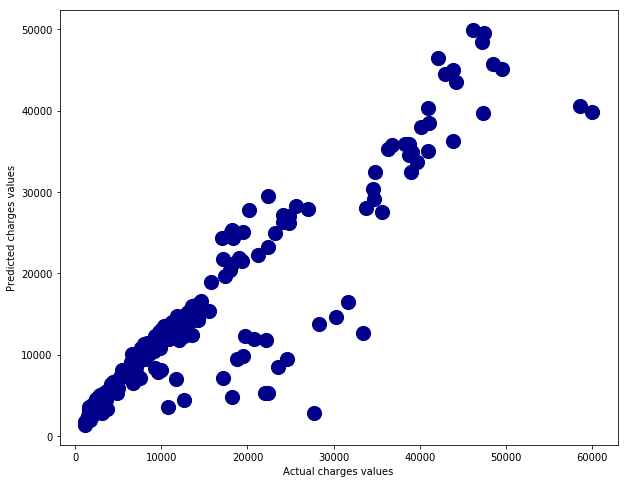

In [41]:
# now we will use our model for the prediction 
y_pred = model_elu_64.predict(x_test).flatten()

plt.figure(figsize = (10,8))

plt.scatter(y_test, y_pred, s = 200, c = 'darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')

plt.show()

In [42]:
# the object of the model is to get the r2 score 
r2_score(y_test, y_pred)

0.854236070627389

In [43]:
# now lets build the model with call backs. Here we are stopping the training when the validation loss
# loss do not improve for the 5 epochs
model_elu_64_with_es = build_model_elu()

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)
training_hist_elu_es= model_elu_64_with_es.fit(x_train,
                                 y_train,
                                 epochs = n_epochs,
                                 validation_split = 0.2,
                                 verbose = True,
                                      callbacks = early_stop)

Epoch 1/1000
27/27 [==============================] - 1s 10ms/step - loss: 345841281.1429 - mae: 14034.9495 - mse: 345841281.1429 - val_loss: 336082848.0000 - val_mae: 12876.5518 - val_mse: 336082848.0000
Epoch 2/1000
27/27 [==============================] - 0s 5ms/step - loss: 301800606.8571 - mae: 13044.1051 - mse: 301800606.8571 - val_loss: 335994496.0000 - val_mae: 12873.9238 - val_mse: 335994496.0000
Epoch 3/1000
27/27 [==============================] - 0s 5ms/step - loss: 314156412.5714 - mae: 13260.9651 - mse: 314156412.5714 - val_loss: 335823808.0000 - val_mae: 12868.6416 - val_mse: 335823808.0000
Epoch 4/1000
27/27 [==============================] - 0s 5ms/step - loss: 319773278.8571 - mae: 13393.4807 - mse: 319773278.8571 - val_loss: 335528640.0000 - val_mae: 12859.3574 - val_mse: 335528640.0000
Epoch 5/1000
27/27 [==============================] - 0s 5ms/step - loss: 308322618.2857 - mae: 13214.8303 - mse: 308322618.2857 - val_loss: 335065664.0000 - val_mae: 12844.7422 - val

27/27 [==============================] - 0s 5ms/step - loss: 120141856.8571 - mae: 7135.0302 - mse: 120141856.8571 - val_loss: 124668304.0000 - val_mae: 7124.5688 - val_mse: 124668304.0000
Epoch 42/1000
27/27 [==============================] - 0s 5ms/step - loss: 106801094.0000 - mae: 6879.3917 - mse: 106801094.0000 - val_loss: 121605256.0000 - val_mae: 7194.0957 - val_mse: 121605256.0000
Epoch 43/1000
27/27 [==============================] - 0s 5ms/step - loss: 108750558.0000 - mae: 6962.7323 - mse: 108750558.0000 - val_loss: 118841240.0000 - val_mae: 7276.8145 - val_mse: 118841240.0000
Epoch 44/1000
27/27 [==============================] - 0s 5ms/step - loss: 107870636.8571 - mae: 6943.8526 - mse: 107870636.8571 - val_loss: 116465960.0000 - val_mae: 7360.2524 - val_mse: 116465960.0000
Epoch 45/1000
27/27 [==============================] - 0s 5ms/step - loss: 102209276.8571 - mae: 6936.7911 - mse: 102209276.8571 - val_loss: 114477768.0000 - val_mae: 7435.3384 - val_mse: 114477768.0000

Epoch 82/1000
27/27 [==============================] - 0s 4ms/step - loss: 66504800.2857 - mae: 6090.1156 - mse: 66504800.2857 - val_loss: 69194232.0000 - val_mae: 6295.7583 - val_mse: 69194232.0000
Epoch 83/1000
27/27 [==============================] - 0s 4ms/step - loss: 65740816.1429 - mae: 6200.0671 - mse: 65740816.1429 - val_loss: 67621336.0000 - val_mae: 6210.4839 - val_mse: 67621336.0000
Epoch 84/1000
27/27 [==============================] - 0s 3ms/step - loss: 61100501.0000 - mae: 5877.9548 - mse: 61100501.0000 - val_loss: 66031380.0000 - val_mae: 6121.5869 - val_mse: 66031380.0000
Epoch 85/1000
27/27 [==============================] - 0s 3ms/step - loss: 60616259.7143 - mae: 5866.6110 - mse: 60616259.7143 - val_loss: 64380092.0000 - val_mae: 6073.9648 - val_mse: 64380092.0000
Epoch 86/1000
27/27 [==============================] - 0s 4ms/step - loss: 58476995.5714 - mae: 5704.9874 - mse: 58476995.5714 - val_loss: 62779848.0000 - val_mae: 5972.0303 - val_mse: 62779848.0000
Epoch

27/27 [==============================] - 0s 3ms/step - loss: 39563151.1429 - mae: 4382.5702 - mse: 39563151.1429 - val_loss: 29964104.0000 - val_mae: 3702.5664 - val_mse: 29964104.0000
Epoch 124/1000
27/27 [==============================] - 0s 4ms/step - loss: 34877691.0714 - mae: 4051.9215 - mse: 34877691.0714 - val_loss: 29755298.0000 - val_mae: 3676.7654 - val_mse: 29755298.0000
Epoch 125/1000
27/27 [==============================] - 0s 3ms/step - loss: 40008813.4286 - mae: 4355.2771 - mse: 40008813.4286 - val_loss: 29536930.0000 - val_mae: 3689.8018 - val_mse: 29536930.0000
Epoch 126/1000
27/27 [==============================] - 0s 3ms/step - loss: 40103411.5714 - mae: 4366.6078 - mse: 40103411.5714 - val_loss: 29249828.0000 - val_mae: 3654.9878 - val_mse: 29249828.0000
Epoch 127/1000
27/27 [==============================] - 0s 3ms/step - loss: 33758134.2143 - mae: 3993.3009 - mse: 33758134.2143 - val_loss: 29046354.0000 - val_mae: 3613.1741 - val_mse: 29046354.0000
Epoch 128/1000


27/27 [==============================] - 0s 3ms/step - loss: 31686093.0714 - mae: 3785.0080 - mse: 31686093.0714 - val_loss: 25741566.0000 - val_mae: 3197.5327 - val_mse: 25741566.0000
Epoch 165/1000
27/27 [==============================] - 0s 3ms/step - loss: 30709082.2857 - mae: 3796.1822 - mse: 30709082.2857 - val_loss: 25704830.0000 - val_mae: 3226.9470 - val_mse: 25704830.0000
Epoch 166/1000
27/27 [==============================] - 0s 3ms/step - loss: 34241445.9286 - mae: 4017.0238 - mse: 34241445.9286 - val_loss: 25648004.0000 - val_mae: 3226.2727 - val_mse: 25648004.0000
Epoch 167/1000
27/27 [==============================] - 0s 4ms/step - loss: 34123123.6429 - mae: 3965.9823 - mse: 34123123.6429 - val_loss: 25586444.0000 - val_mae: 3170.4482 - val_mse: 25586444.0000
Epoch 168/1000
27/27 [==============================] - 0s 3ms/step - loss: 33185131.4286 - mae: 3884.7492 - mse: 33185131.4286 - val_loss: 25489678.0000 - val_mae: 3170.1191 - val_mse: 25489678.0000
Epoch 169/1000


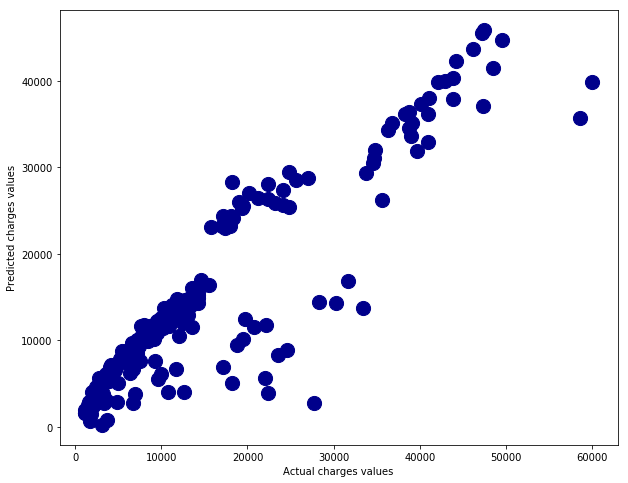

In [44]:
# now we will use our model for the prediction 
y_pred = model_elu_64_with_es.predict(x_test).flatten()

plt.figure(figsize = (10,8))

plt.scatter(y_test, y_pred, s = 200, c = 'darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')

plt.show()

In [45]:
# the object of the model is to get the r2 score 
r2_score(y_test, y_pred)

0.83396841939715

In [46]:
#now lets look at the summary of the model 
model_elu_64_with_es.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [47]:
# now we will save the model of the weights which can be used 
# fro future purposes
model_elu_64_with_es.save_weights("../weights/relu_64_weights")

In [48]:
# tensorflow also allows us to store the weight in HDF format (Hierarchical Data format)
# which is designed to store and organise large aounts of data -lightweight atlernative to 
# the saved model format 
model_elu_64_with_es.save_weights("../weights/HDF/relu_64_weights.h5",save_format = 'h5')

In [49]:
# tensorflow also allows us to store the configuration or architecture of the 
# model by converting it into a json format 

relu_64_json = model_elu_64_with_es.to_json()

pprint.pprint(json.loads(relu_64_json))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'InputLayer',
                        'config': {'batch_input_shape': [None, 9],
                                   'dtype': 'float32',
                                   'name': 'dense_6_input',
                                   'ragged': False,
                                   'sparse': False}},
                       {'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 9],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_c

In [50]:
# we will now write the configuration to a file 
with open("../configuration/relu_64_config.json", 'w') as outfile:
    outfile.write(relu_64_json)

In [51]:
# tensorflow also allows us to store the weights and the configuration in a single 
# artifact. The architecture, weights, compile information, optimizer and the state
# information can be store 
model_elu_64_with_es.save("../all-in-one-weights-configuration/relu_64_config_weights")

INFO:tensorflow:Assets written to: ../all-in-one-weights-configuration/relu_64_config_weights\assets


# Lets now use all the files which are created from above note books

In [71]:
processed_data = pd.read_csv('../data-sets/insurance_processed.csv')
processed_data = processed_data.drop('Unnamed: 0', axis = 1)

processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [72]:
# lets now again differenciate between the features and the target
processed_features = processed_data.drop('charges', axis = 1)
target = processed_data[['charges']]

In [73]:
# now we will again spilt the data into test and train
x_train, x_test, y_train,y_test = train_test_split(processed_features,
                                                  target,
                                                  test_size = 0.2,
                                                  random_state = 1)

In [74]:
#now we will read the configuration file and store it 
with open('../configuration/relu_64_config.json', 'r') as infile:
    model_json = json.load(infile)
pprint.pprint(model_json)

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'InputLayer',
                        'config': {'batch_input_shape': [None, 9],
                                   'dtype': 'float32',
                                   'name': 'dense_6_input',
                                   'ragged': False,
                                   'sparse': False}},
                       {'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 9],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_c

In [75]:
# previously we had only the configuration of the model. now we will be re-creating the 
# models architecture using model_from_json
model = tf.keras.models.model_from_json(json.dumps(model_json))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


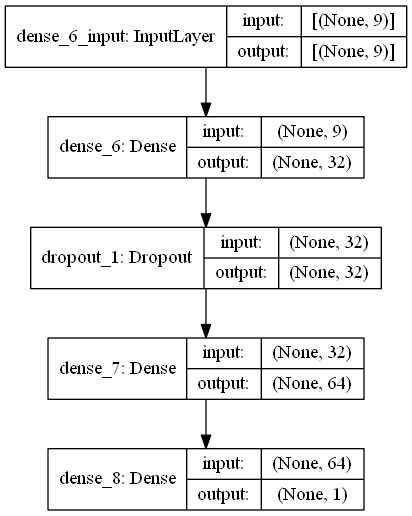

In [76]:
# if we want to see the shapes and the number of neurons in each layer
keras.utils.plot_model(model, 'model_relu_64_reloaded.png', show_shapes = True)

In [77]:
# now we will predict the values using the model which we have created in the previous 
# step 
y_pred_after_loading = model.predict(x_test)
r2_score(y_test,y_pred_after_loading)

# here we are getting the r2 score negative because the configuration has only the weights initilized to zero. 
# weights only with initial value is present in the config file.
# other weights are not present in the config file 
# we need load the weights and predict the values

-1.2084502584694348

In [78]:
# now here we will load the weights of the model. This is the checkpoint format
# in tensorflow
model.load_weights('../weights/relu_64_weights')

In [79]:
# now we will predict the value with the loaded weights
y_pred_after_loading = model.predict(x_test)
r2_score(y_test, y_pred_after_loading)

0.83396841939715

In [81]:
# now we will load the configuration and weights using load_model
loaded_model = tf.keras.models.load_model('../all-in-one-weights-configuration/relu_64_config_weights')
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [82]:
# now we will predict the value with the loaded weights and configuration 
y_pred_after_loading = loaded_model.predict(x_test)
r2_score(y_test, y_pred_after_loading)

0.83396841939715